In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
import tensorflow.contrib.learn as skflow
%matplotlib inline

sns.set()

In [2]:
df = pd.read_csv('data/Speed Dating Data.csv', encoding="ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [3]:
df.shape

(8378, 195)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [5]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


__Seperate target from features__

In [6]:
df_X, y = df.drop(['match'], axis=1), df['match']

In [7]:
# Drop columns with more than 22% missing values
# 6600 is ~22% missing values
df_X = df_X.dropna(axis=1,thresh=6600)
df_X.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,4,1,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,3,2,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,10,3,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,5,4,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,7,5,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [8]:
df_X.shape

(8378, 104)

In [9]:
df_X = df_X.fillna(df.median())

In [10]:
np.sum(df_X.isnull().sum())

1295

__Df still has NaN values__

In [11]:
null_col = df_X.isnull().sum() > 0
null_col[null_col != 0]

field      True
from       True
zipcode    True
career     True
dtype: bool

__The columns field, from, zipcode, and career have NaN values__

In [12]:
df_X[['field','from','zipcode','career']].head()

,field,from,zipcode,career
0,Law,Chicago,"60,521",lawyer
1,Law,Chicago,"60,521",lawyer
2,Law,Chicago,"60,521",lawyer
3,Law,Chicago,"60,521",lawyer
4,Law,Chicago,"60,521",lawyer


In [13]:
df_X.drop(['field','from','zipcode','career'],axis=1,inplace=True)

In [14]:
np.sum(df_X.isnull().sum())

0

__No more NaN Values remaining__

# Normalize data

In [15]:
X = StandardScaler().fit_transform(df_X)
X

array([[-1.78261324, -1.44975265, -1.00119432, ..., -0.19063332,
        -0.44028263, -0.9326512 ],
       [-1.78261324, -1.44975265, -1.00119432, ..., -0.19063332,
        -0.44028263, -0.9326512 ],
       [-1.78261324, -1.44975265, -1.00119432, ..., -0.19063332,
        -0.44028263, -0.9326512 ],
       ..., 
       [ 1.69210734,  2.37490744,  0.99880711, ..., -1.08638542,
        -1.12223638,  0.88084526],
       [ 1.69210734,  2.37490744,  0.99880711, ..., -1.08638542,
        -1.12223638,  0.88084526],
       [ 1.69210734, -0.17486595,  0.99880711, ..., -1.08638542,
        -1.12223638,  0.88084526]])

# PCA

In [16]:
pca = PCA().fit(X)

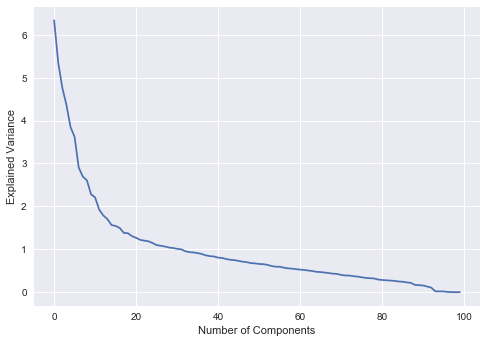

In [17]:
plt.figure()
plt.plot(pca.explained_variance_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

__It appears that most of variability is in the first 65 dimensions__

In [18]:
pca_reduced = PCA(n_components=65).fit_transform(X)
pca_reduced.shape

(8378, 65)

# Split Data into Train/Test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(pca_reduced,y,random_state=23)

# Models

__Random Forest__

In [20]:
rand_forest = RandomForestClassifier(n_estimators=300,oob_score=True)
rf_fit = rand_forest.fit(X_train,y_train)
rf_predict = rf_fit.predict(X_test)

In [21]:
print("Accuracy Score: {:.2f}".format(metrics.accuracy_score(y_test,rf_predict)))
print("Precision Score: {:.2f}".format(metrics.precision_score(y_test,rf_predict)))
print("Recall Score: {:.2f}".format(metrics.recall_score(y_test,rf_predict)))

Accuracy Score: 0.88
Precision Score: 0.99
Recall Score: 0.23


__Prediction accuracy/precision is high, without tweaking any hyperparameters, however recall is very low due to a high number of False Negatives__

In [22]:
confusion_matrix(y_test,rf_predict)

array([[1782,    1],
       [ 241,   71]])

__Sklearn confusion matrix format:__  
__([TN,FP ],__   
__[FN,TP]) __

__Support Vector Classifier__

In [23]:
svc = SVC()
svc.fit(X_train,y_train)
svc_predict = svc.predict(X_test)

In [24]:
print("Accuracy Score: {:.2f}".format(metrics.accuracy_score(y_test,svc_predict)))
print("Precision Score: {:.2f}".format(metrics.precision_score(y_test,svc_predict)))
print("Recall Score: {:.2f}".format(metrics.recall_score(y_test,svc_predict)))

Accuracy Score: 0.99
Precision Score: 0.99
Recall Score: 0.93


In [25]:
confusion_matrix(y_test,svc_predict)

array([[1781,    2],
       [  23,  289]])

__Prediction accuracy and recall is even higher than in random forest, precision is slightly lower __

__Tensor Flow__

In [26]:
x_ = skflow.infer_real_valued_columns_from_input(X_train)
y_ = skflow.DNNClassifier(feature_columns=x_,hidden_units=[55]) 

y_.fit(X_train, y_train, steps=300)
tf_predict = list(y_.predict(X_test, as_iterable=True))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_environment': 'local', '_save_summary_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_type': None, '_master': '', '_evaluation_master': '', '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1246eaef0>, '_is_chief': True, '_save_checkpoints_steps': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

//anaconda/envs/kerastf/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/6r/nlgsx8550rd8dqcz00nrn_h80000gn/T/tmpxh1gjsci/model.ckpt.
INFO:tensorflow:step = 1, loss = 0.882471
INFO:tensorflow:global_step/sec: 10.5793
INFO:tensorflow:step = 101, loss = 0.157834
INFO:tensorflow:global_step/sec: 10.7909
INFO:tensorflow:step = 201, loss = 0.0693612
INFO:tensorflow:Saving checkpoints for 300 into /var/folders/6r/nlgsx8550rd8dqcz00nrn_h80000gn/T/tmpxh1gjsci/model.ckpt.
INFO:tensorflow:Loss for final step: 0.039296.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


In [27]:
print("Accuracy Score: {:.2f}".format(metrics.accuracy_score(y_test,tf_predict)))
print("Precision Score: {:.2f}".format(metrics.precision_score(y_test,tf_predict)))
print("Recall Score: {:.2f}".format(metrics.recall_score(y_test,tf_predict)))

Accuracy Score: 0.99
Precision Score: 0.97
Recall Score: 0.96


In [28]:
metrics.confusion_matrix(y_test,tf_predict)

array([[1775,    8],
       [  14,  298]])

__Gradient Boosting__

In [29]:
grad_boost = GradientBoostingClassifier(n_estimators=300,max_depth=8,verbose=1)
gb_fit = grad_boost.fit(X_train,y_train)
gb_predict = gb_fit.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           0.7892           54.02s
         2           0.6994           55.01s
         3           0.6302           54.92s
         4           0.5732           54.98s
         5           0.5253           54.67s
         6           0.4828           54.82s
         7           0.4437           55.01s
         8           0.4110           56.33s
         9           0.3817           57.34s
        10           0.3542           57.82s
        20           0.1832           54.93s
        30           0.1032           52.18s
        40           0.0628           50.20s
        50           0.0386           48.53s
        60           0.0241           46.69s
        70           0.0152           44.79s
        80           0.0099           42.58s
        90           0.0063           40.59s
       100           0.0040           38.61s
       200           0.0004           14.30s
       300           0.0004            0.00s


In [30]:
print("Accuracy Score: {:.2f}".format(metrics.accuracy_score(y_test,gb_predict)))
print("Precision Score: {:.2f}".format(metrics.precision_score(y_test,gb_predict)))
print("Recall Score: {:.2f}".format(metrics.recall_score(y_test,gb_predict)))

Accuracy Score: 0.93
Precision Score: 0.94
Recall Score: 0.54


In [31]:
confusion_matrix(y_test,gb_predict) 

array([[1772,   11],
       [ 144,  168]])

__Tensorflow has the best overall model based on the average of three metrics Accuracy, Precision, and Recall, SVC was not very far behind__